In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
auto = pd.read_csv('data/06-automobile.csv')
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
0,3,115.0,alfa-romero,gas,std,two,rwd,front,88.6,168.8,...,111.0,5000.0,21,27,13495.0,1,0,0,0,0
1,3,115.0,alfa-romero,gas,std,two,rwd,front,88.6,168.8,...,111.0,5000.0,21,27,16500.0,1,0,0,0,0
2,1,115.0,alfa-romero,gas,std,two,rwd,front,94.5,171.2,...,154.0,5000.0,19,26,16500.0,0,0,1,0,0
3,2,164.0,audi,gas,std,four,fwd,front,99.8,176.6,...,102.0,5500.0,24,30,13950.0,0,0,0,1,0
4,2,164.0,audi,gas,std,four,4wd,front,99.4,176.6,...,115.0,5500.0,18,22,17450.0,0,0,0,1,0


<AxesSubplot:>

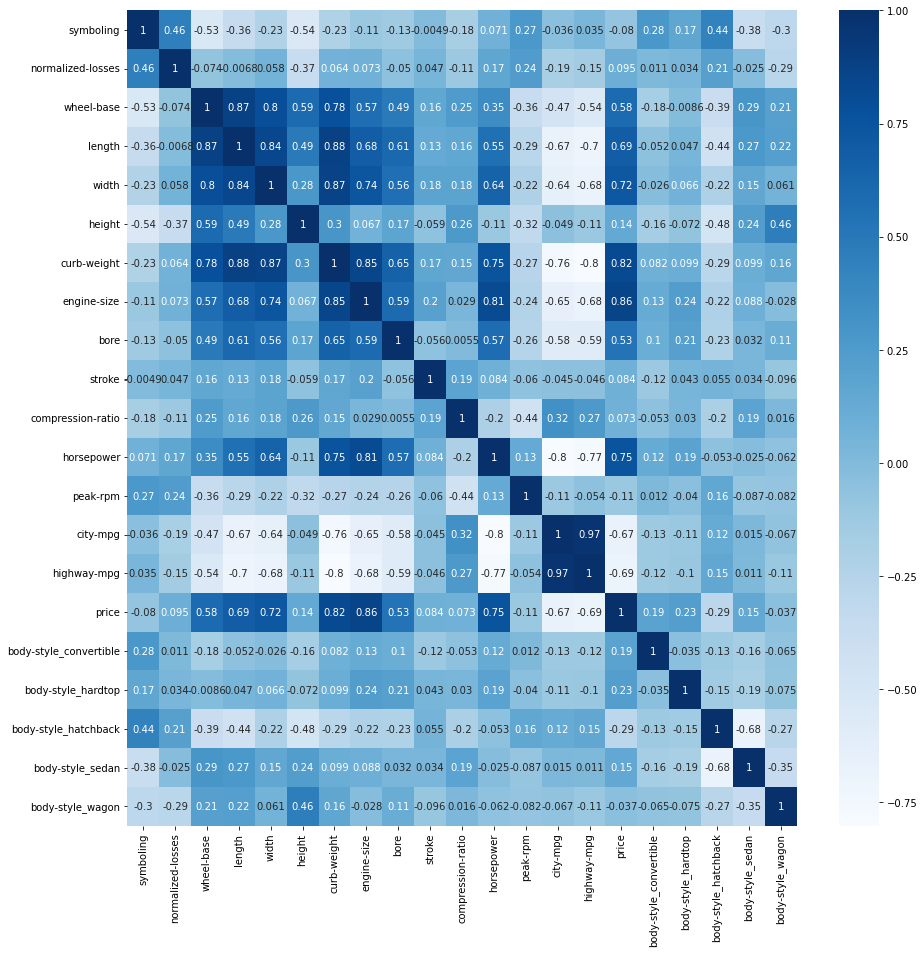

In [3]:
# Pairwise correlations
plt.figure(figsize=(15,15))
sns.heatmap(auto.corr(), cbar=True, annot=True, cmap='Blues')

## Linear regression

In [4]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(auto[['engine-size']], auto['price'])

LinearRegression()

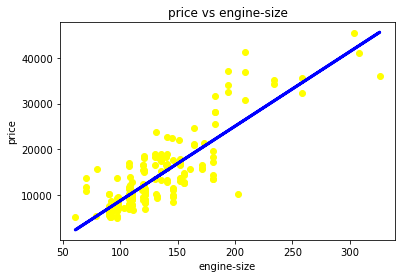

In [5]:
# plot data and prediction
plt.scatter(auto['engine-size'], auto['price'],  color='yellow')
plt.plot(auto['engine-size'], regr.predict(auto[['engine-size']]), 
         color='blue', linewidth=3)

plt.title("price vs engine-size") # stating the title of the graph
plt.xlabel("engine-size") # adding the name of x-axis
plt.ylabel("price") # adding the name of y-axis
plt.show()

In [6]:
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1

lr.intercept_: -7508.114148076236
lr.coef_: [162.78353322]


In [7]:
# Multiple regression

regr.fit(auto[['engine-size', 'curb-weight']], auto['price'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) # b1, b2

lr.intercept_: -13316.764587121206
lr.coef_: [111.55223609   4.81704547]


In [8]:
# Multiple regression with dummy variable

regr.fit(auto[['engine-size', 'curb-weight', 'body-style_convertible', 
               'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 
               'body-style_wagon']], auto['price'])
print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_) 

lr.intercept_: -12352.249989314709
lr.coef_: [   92.01392495     5.83545983  3432.21483545  1942.00644001
 -1909.80071319  -546.30541652 -2918.11514575]


## Calculating the MSE and R^2 statistic

In [9]:
regr = linear_model.LinearRegression()
regr.fit(auto[['engine-size']], auto['price'])

LinearRegression()

In [10]:
predictions = regr.predict(auto[['engine-size']])
differences = [(x-y)**2 for (x,y) in zip(predictions, auto['price'])]

In [11]:
MSE = sum(differences) / len(differences)
print("MSE = %3.2f" % (MSE))

MSE = 16050493.31


In [12]:
FVU = MSE / np.var(auto['price']) # Fraction of variance unexplained
R2 = 1 - FVU
print("R2 = %3.2f" % (R2))

R2 = 0.74
